# Cluster data with k-Means


Load in DataFrame with parameters and principle components of correlation plots.

Within the K-Means algorithm a pre-defined number of cluster centers are positioned randomly in the high-dimensional parameter space. Then the each data point is assigned to the nearest cluster center. The mean of all point in a cluster will be the new cluster center. This procedure is done with all clusters and repeated until convergence is reached.

- There is a dependence on initial random points.
- The clusters will be spherical-like

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [2]:
df_pca = pd.read_pickle('df_main.p')
display(df_pca.head())
df_pca.shape

,gBB,gCC,gAB,gAC,gBC,path,pca comp 1,pca comp 2,pca comp 3,pca comp 4,pca comp 5,pca comp 6,pca comp 7,pca comp 8,pca comp 9,pca comp 10
0,-1.0,-1.0,-1.0,-1.0,-1.0,data/batch_001/run_00001,-105.659465,37.965591,75.525219,0.440110,71.498446,-6.941616,-0.005033,24.897444,-19.683921,1.891975
1,-1.0,-1.0,-1.0,-1.0,-0.8,data/batch_001/run_00002,-102.790897,32.000799,59.039534,0.308656,49.503230,-9.023706,0.041075,15.930131,-10.015480,0.990542
2,-1.0,-1.0,-1.0,-1.0,-0.6,data/batch_001/run_00003,-98.020880,24.320418,41.510031,0.182524,29.262609,-9.871892,0.070699,8.940829,-2.802803,0.314344
3,-1.0,-1.0,-1.0,-1.0,-0.4,data/batch_001/run_00004,-90.632865,14.695513,23.230042,0.067592,11.804668,-9.495908,0.081263,4.117469,1.445592,-0.088344
4,-1.0,-1.0,-1.0,-1.0,-0.2,data/batch_001/run_00005,-79.346890,4.165145,4.233191,-0.034407,-0.536990,-8.301869,0.071124,1.586937,2.300852,-0.179525


(18014, 16)

In [3]:
features = df_pca.iloc[:, 6:]
features.head()

,pca comp 1,pca comp 2,pca comp 3,pca comp 4,pca comp 5,pca comp 6,pca comp 7,pca comp 8,pca comp 9,pca comp 10
0,-105.659465,37.965591,75.525219,0.440110,71.498446,-6.941616,-0.005033,24.897444,-19.683921,1.891975
1,-102.790897,32.000799,59.039534,0.308656,49.503230,-9.023706,0.041075,15.930131,-10.015480,0.990542
2,-98.020880,24.320418,41.510031,0.182524,29.262609,-9.871892,0.070699,8.940829,-2.802803,0.314344
3,-90.632865,14.695513,23.230042,0.067592,11.804668,-9.495908,0.081263,4.117469,1.445592,-0.088344
4,-79.346890,4.165145,4.233191,-0.034407,-0.536990,-8.301869,0.071124,1.586937,2.300852,-0.179525


## Determine best number of cluster


The score is within-cluster sum of squares

In [4]:
wcss = []
for number_of_clusters in range(1, 10):
    model = KMeans(
        n_clusters=number_of_clusters,
        random_state=0
    )
    model.fit(features)
    wcss.append(model.score(features))

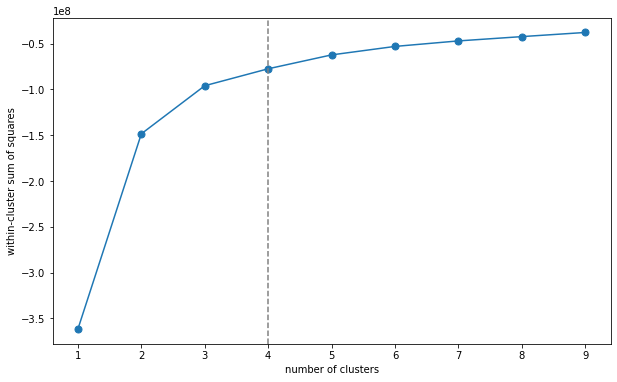

In [9]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.plot(range(1, 10), wcss, marker='o', markersize=7)

ax.set_xlabel('number of clusters')
ax.set_ylabel('within-cluster sum of squares')
ax.axvline(4, color='gray', ls='--');

Calculate the silhouette coefficient **4 clusters**

In [4]:
number_of_clusters = 4

def plot_silhouette_samples(n_clusters):
    """
    Plot the silhouette coefficients of each sample.
    
    Args:
        n_clusters (int): number of clusters for kmeans
    
    Returns:
        None
    """

    model = KMeans(
        n_clusters=n_clusters,
        random_state=0
    )
    model.fit(features)


    arr_sil = silhouette_samples(features, model.labels_)

    sv_sorted = np.sort(arr_sil[model.labels_==0])
    sv_len = sv_sorted.shape[0]

    fig, ax = plt.subplots()

    start, end = 0, 0
    for c in range(n_clusters):

        sv_sorted = np.sort(arr_sil[model.labels_==c])
        sv_len = sv_sorted.shape[0]

        end += sv_len
        ax.barh(y=range(start, end), width=sv_sorted, height=0.8, label=c)
        #ax.axhline(end, c='gray', lw=0.5, ls='--')

        start = end

    ax.set_title(f'Cluster {n_clusters}')
    ax.set_xlabel('Silhouette coeff')
    ax.set_xlabel('Rank in Cluster')
    plt.show()

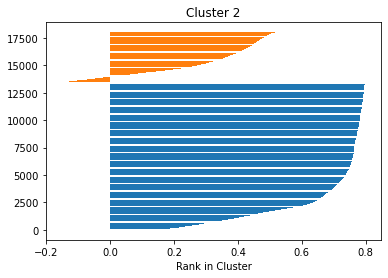

In [5]:
plot_silhouette_samples(n_clusters=2)

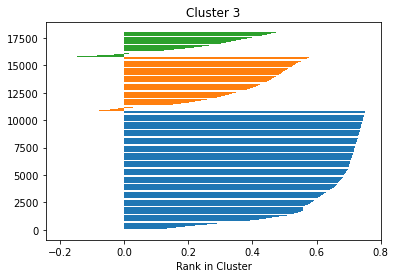

In [17]:
plot_silhouette_samples(n_clusters=3)

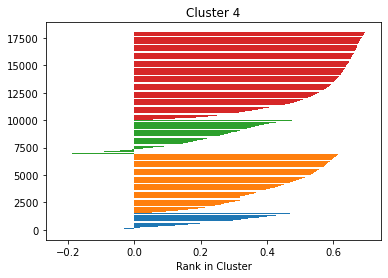

In [18]:
plot_silhouette_samples(n_clusters=4)

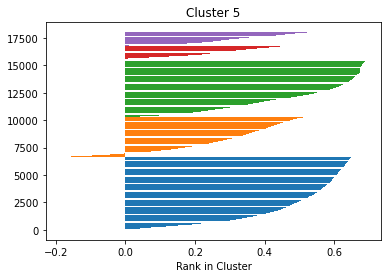

In [19]:
plot_silhouette_samples(n_clusters=5)

## Plot clusters

Remind, we try to cluster the correlation plots of species B and C (both bosonic), while species A (fermionic) acts as a mediator.

We expect an induced attraction between B and C, when gAB * gAC > 0 and an induced repulsion for gAB * gAC < 0.
An induced attraction (repulsion) potentially leads to a correlated (anti-correlated) behavior.
However, this induced interaction needs to be compared with the intraspecies interaction strength gBC,

We expect roughly an behavior like:
    gAB * gAC + gBC < 0: correlation
    gAB * gAC + gBC > 0: anti-correlation
    
The hope is that the cluster will show this behavior.

In [54]:
# First train the Kmeans-model again for n_clusters:

n_clusters = 4

model = KMeans(
    n_clusters=n_clusters,
    random_state=0
)
model.fit(features)

df_pca.loc[:, 'cluster'] = model.labels_

# combine parameters
df_pca.loc[:, 'gAB * gAC'] = df_pca.loc[:, 'gAB'] * df_pca.loc[:, 'gAC']


Explore clusters regions in parameter space

In [20]:
import seaborn as sns
from matplotlib.colors import ListedColormap

colors = ['tomato', "cornflowerblue", 'gold', 'forestgreen']
# cmap = ListedColormap(colors)

<AxesSubplot:xlabel='gAB * gAC', ylabel='gBC'>

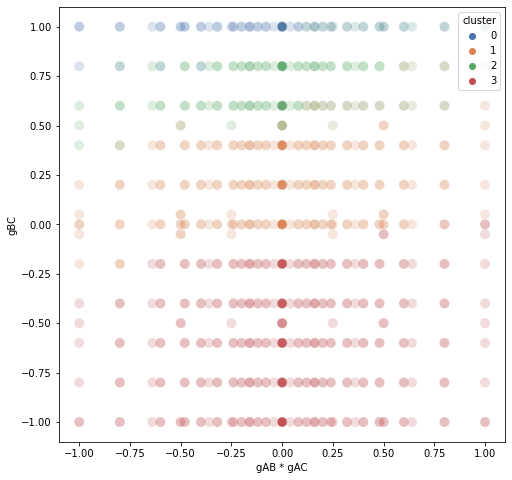

In [55]:
fig, axes = plt.subplots(figsize=(8, 8))

mask = (df_pca.loc[:, 'gBB'] == 0) & (df_pca.loc[:, 'gCC'] == 0)


sns.scatterplot(
    x='gAB * gAC',
    y='gBC',
    hue='cluster',
    data=df_pca.loc[mask, :],
    palette='deep',
    alpha=0.1,
    ax=axes,
    s=100
)


Text(0, 0.5, 'gAB')

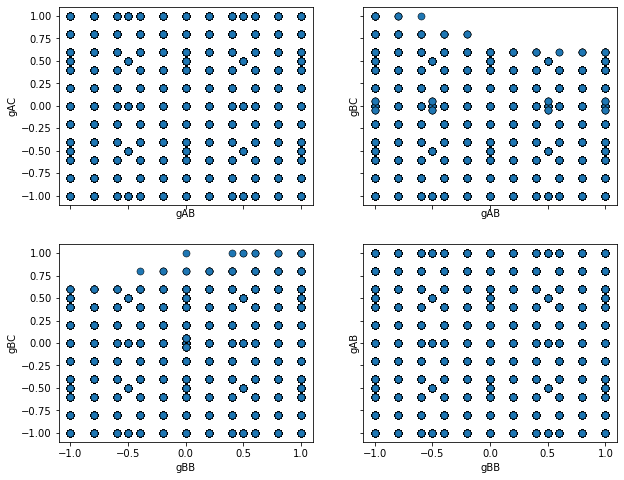

In [27]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8))

styles = {
    'cmap':cmap,
    'edgecolors':'black',
    'linewidth':0.5,
    's':50
}

# BB, CC, AB, AC, BC

# gBB = gCC = gBC = 0
mask_0 = df_pca.loc[:, 'cluster'] == 0



# top left
axes[0, 0].scatter(
    df_pca.loc[mask_0, 'gAB'],
    df_pca.loc[mask_0, 'gAC'], 
    **styles
)
axes[0, 0].set_xlabel('gAB')
axes[0, 0].set_ylabel('gAC')

# top right
axes[0, 1].scatter(
    df_pca.loc[mask_0, 'gAB'],
    df_pca.loc[mask_0, 'gBC'], 
    **styles
)
axes[0, 1].set_xlabel('gAB')
axes[0, 1].set_ylabel('gBC')


# bot left
axes[1, 0].scatter(
    df_pca.loc[mask_0, 'gBB'],
    df_pca.loc[mask_0, 'gBC'], 
    **styles
)
axes[1, 0].set_xlabel('gBB')
axes[1, 0].set_ylabel('gBC')


# bot right
axes[1, 1].scatter(
    df_pca.loc[mask_0, 'gBB'],
    df_pca.loc[mask_0, 'gAB'], 
    **styles
)
axes[1, 1].set_xlabel('gBB')
axes[1, 1].set_ylabel('gAB')

